In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

import pylab
pylab.rcParams['figure.figsize'] = (6.5, 5)
plt.rcParams.update({'font.size': 22})
params = {'font.size': 22,
         'font.family': 'lmodern',
         }
plt.rcParams.update(params)

# Bilinear Objective

Example of bilinear objectives is WGAN with a discriminator $D(x) = \phi x$, between $x_{true} \sim \mathcal{N}(0,1)$ and $x_{gen} = z + \theta$ with $z \sim \mathcal{N}(0,1)$ then: $$\min_\theta \max_\phi \theta\phi$$
Note: 
- Actually works for any distribution, as long as the discriminator and generator are linear.
- Draw a line between both distribution at the middle of the means, and shift the distribution until the mean is the same.

[[-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]
 [-1.2        -0.82222222 -0.44444444 -0.06666667  0.31111111  0.68888889
   1.06666667  1.44444444  1.82222222  2.2       ]


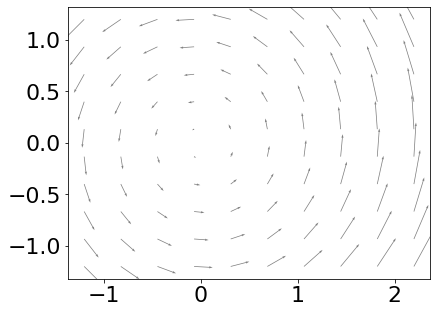

In [12]:
x_0, y_0 = 2., 0.5
OUTPUT_PATH = 'figure'
N_ITER = 100
markevery=10
""" Return coordinate matrices from coordinate vectors. """
X, Y = np.meshgrid(np.linspace(-1.2, 2.2, 10), np.linspace(-1.2, 1.2, 10))
F_x = -Y
F_y = X

fig1 = plt.figure(1)
ax1 = fig1.gca()
""" Plot a 2D field of arrows, call signature: quiver([X, Y], U, V, [C], **kw)
where X, Y define the arrow locations, U, V define the arrow directions,
and C optionally sets the color. """
Q = ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.002)

def grad(x, y):
    return -y, x

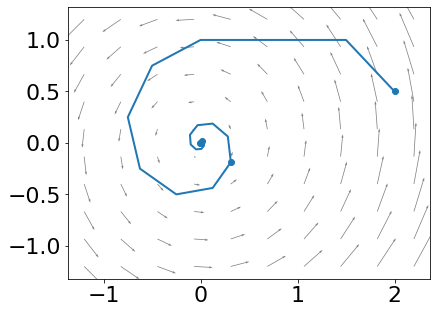

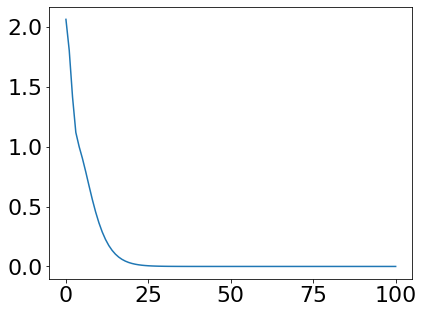

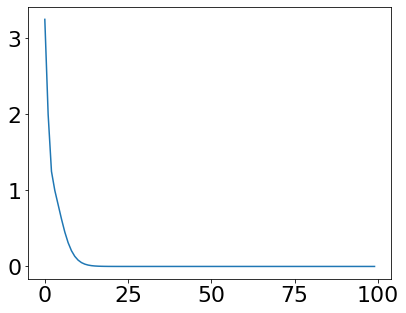

In [6]:
fig2 = plt.figure(2)
ax2 = fig2.gca()
fig3 = plt.figure(3)
ax3 = fig3.gca()

# New Extragradient
x, y = x_0, y_0
x_, y_ = x, y
LR = .5
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    
    x__ = x_
    x_ = x + LR*(-y_)
    y_ = np.clip(y + LR*(x__), -1, 1)
    
    x = x + LR*(-y_)
    y = np.clip(y + LR*(x_), -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2 + y**2)

new_extra_sgd = ax1.plot(x_hist, y_hist, alpha=1,linewidth=2, label='OneSEM $\gamma=0.5$',markevery=markevery, marker='o')
ax2.plot(loss_hist, label='OneSEM $\gamma=0.5$')
ax3.plot(grad_norm, label='OneSEM $\gamma=0.5$')
fig1

In [7]:
%%capture

# Extragradient
x, y = x_0, y_0
LR = 0.6
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    x_ = x + LR*(-y)
    y_ = y + LR*(x)
    
    x = x + LR*(-y_)
    y = np.clip(y + LR*(x_), -1, 1)
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2 + y**2)

extra_sgd = ax1.plot(x_hist, y_hist, alpha=1,linewidth=2, label='SEM $\gamma=0.6$',markevery=markevery, marker='o')
ax2.plot(loss_hist, label='SEM $\gamma=0.6$')
ax3.plot(grad_norm, label='SEM $\gamma=0.6$')

x_init = ax1.scatter(x_0, y_0, marker='s', s=100, c='k',alpha=1,zorder=1000)
ax1.legend([x_init],['Start'], markerscale=0.5, loc=4, fancybox=True, framealpha=1., fontsize=20)
#ax2.legend(loc=2, fancybox=True, framealpha=1., fontsize=14)
ax3.legend(loc=2, fancybox=True, framealpha=1., fontsize=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
ax2.grid(True,which="both",ls="-",alpha=0.4)
ax2.set_xlim(-1,100)
ax2.set_ylim(-0.1,2.1)
ax2.set_yticks([0.,0.5,1.,1.5,2.])
ax3.grid(True,which="both",ls="-",alpha=0.4)
ax1.set_xlabel(r'$\theta$', fontsize = 24)
ax1.set_ylabel(r'$\phi$', fontsize = 24)
ax1.set_title('Gradient Vector Field and Trajectory')
ax2.set_xlabel('Number of Iterations', fontsize = 22)
ax2.set_ylabel('Distance to the optimum', fontsize = 22)
ax2.set_title('Training Curves')
#fig1.savefig(os.path.join(OUTPUT_PATH, 'bilinear_toy_vector_field.pdf'), bbox_inches='tight')
#fig2.savefig(os.path.join(OUTPUT_PATH, 'bilinear_toy_train_curve.pdf'), bbox_inches='tight')figLegend = pylab.figure(figsize = (1.5,1.3))
figLegend = pylab.figure(figsize = (1.5,1.3))
a=pylab.figlegend(*ax1.get_legend_handles_labels(), loc = 'upper left',ncol=2,fontsize=22)

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


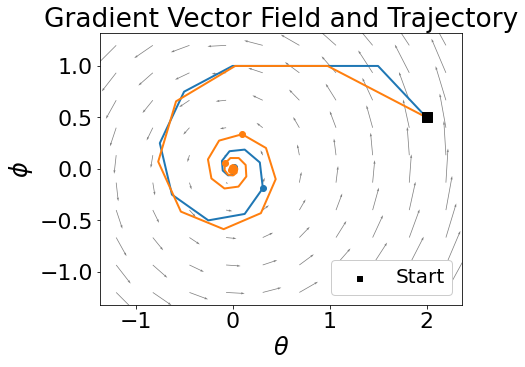

In [8]:
fig1

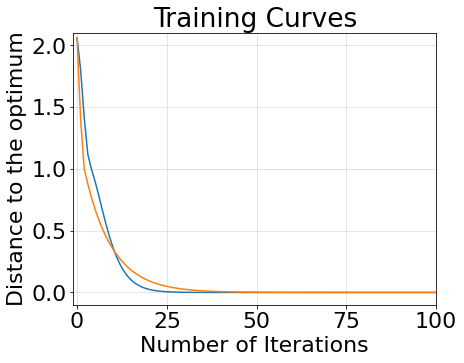

In [9]:
fig2